# Student Marks Prediction using Linear Regression

## Objective -
### Predict the percentage of a student based on the no. of study hours.
### Find the predicted score if a student studies for 9.25 hrs/ day

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Reading Data

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.shape

(25, 2)

## Plotting Hours vs Scores 

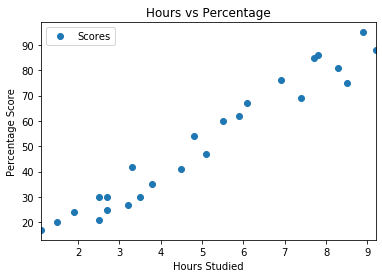

In [5]:
df.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph we can see that there is a linear relation between Hours studied and Scores

## Preparing Data

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20) 

## Training the algorithm

In [9]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()  

In [10]:
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plotting the regression line

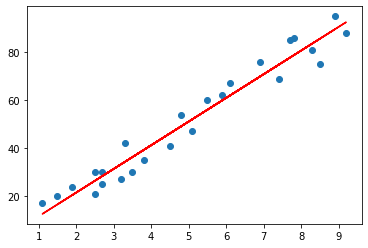

In [12]:
reg_line=linear_regression.coef_*x+linear_regression.intercept_

plt.scatter(x,y)
plt.plot(x,reg_line,c='red')
plt.show()

## Making Predictions

In [13]:
y_pred=linear_regression.predict(x_test)

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  #comparing Actual vs Predicted values

In [15]:
df

,Actual,Predicted
0,30,26.387745
1,20,16.515714
2,54,49.093417
3,27,33.298167
4,30,28.362151


In [21]:
hours=np.array([9.5]).reshape(-1,1) #predicting for hours=9.5
percentage=linear_regression.predict(hours)
print(f'Number of hours {hours}')
print(f'Predicted Percentage {percentage[0]}')

Number of hours [[9.5]]
Predicted Percentage 95.49196456764884


## Evaluating the Model

In [19]:
from sklearn import metrics 
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_pred,y_test))

Mean Absolute Error:  3.987828023466445


In [20]:
print('Mean Squared Error: ',metrics.mean_squared_error(y_pred,y_test))

Mean Squared Error:  18.322529891756794
